<a href="https://colab.research.google.com/github/Kyamzzz/GISMA/blob/main/decision_trees_graphviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
You should build a machine learning pipeline using a decision tree model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Train and test a decision tree model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

## Importing the Libraries

In [ ]:
import pandas as pd
import sklearn.model_selection
import sklearn.tree
import sklearn.metrics

## Uploading the dataset

In [ ]:
df = pd.read_csv("mnist.csv")
df = df.set_index('id')
df.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
id,,,,,,,,,,,,,,,,,,,,,
31953,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34452,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60897,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split the data

In [ ]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=8, test_size=0.25)
print("df:", df.shape)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

df: (4000, 785)
X_train: (3000, 784)
X_test: (1000, 784)
y_train: (3000,)
y_test: (1000,)


## Train the data

In [ ]:
model = sklearn.tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=9, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

## Test the data

In [ ]:
y_pred = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracy= accuracy*100
accuracy

78.60000000000001

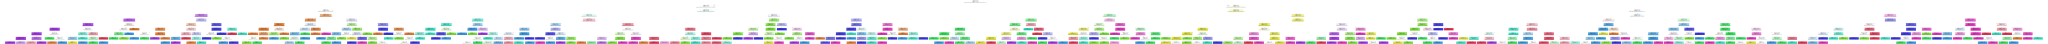

In [ ]:
import graphviz
dot_data = sklearn.tree.export_graphviz(model, out_file=None, filled=True)
graph = graphviz.Source(dot_data, format="png")
graph